# Bagging and Random Forests

## Bagging

Bootstrap aggregation. It is an ensemble method but different than voting classifier. Bagging uses one algorithm with different subsets of the data. Has the effect of reducing the varience of individual models.

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

cancer = pd.read_csv("cancer.csv")
X = cancer.drop(["id", "Unnamed: 32", "diagnosis"], axis=1)
y = cancer["diagnosis"]
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y, random_state=1)
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred=bc.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of Bagging Classifier: {:.3f}".format(accuracy))

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier: {:.3f}".format(accuracy))

Accuracy of Bagging Classifier: 0.930
Accuracy of Decision Tree Classifier: 0.889


Results show that bagging outperforms the base estimator.

### Define the bagging classifier

In [61]:
liver = pd.read_csv("indian_liver_patient.csv")
liver = liver.dropna()
X = liver.drop(["Dataset"], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = liver["Dataset"].replace(2,0)


dt = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

### Evaluate Bagging performance

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of dt: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.67
Test set accuracy of dt: 0.63


## Out of Bag Evaluation

On average for each model 63% of the training instances are sampled. The remaining 37% constitute the OOB instances. Since they are not seen by a model during training, these can be used to estimate the performance without the need for cross-validation.

OOB score corresponds to the accuracy for classifiers and the r-squared score for regressors.

In [68]:
X = cancer.drop(["id", "Unnamed: 32", "diagnosis"], axis=1)
y = cancer["diagnosis"]
le = LabelEncoder()
y = le.fit_transform(y)
# y = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y, random_state=1)
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred=bc.predict(X_test)
test_accuracy=accuracy_score(y_test, y_pred)
oob_accuracy = bc.oob_score_
print("Test set accuracy: {:.3f}".format(test_accuracy))
print("OOB accuracy: {:.3f}".format(oob_accuracy))

Test set accuracy: 0.930
OOB accuracy: 0.920


### Prepare the ground


In [76]:
liver = pd.read_csv("indian_liver_patient.csv")
liver = liver.dropna()
X = liver.drop(["Dataset"], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = liver["Dataset"].replace(2,0)

dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True,
                      random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=1)

### OOB Score vs Test Set Score

In [77]:
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
acc_oob = bc.oob_score_
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


## Random Forests (RF)


The base estimator is Desicion Tree. Each estimator is trained on a different bootstrap sample having the same size as the training set. RF introduces further randomization than bagging when training each of the base estimators. d features are sampled at each node without replacment -> further diversity.

For classification the final prediction is made by majority voting. For regression average of the labels. Lower variance. (both like in the bagging.)

Test set RMSE of rf: 3.98
Test set RMSE of dt: 4.43


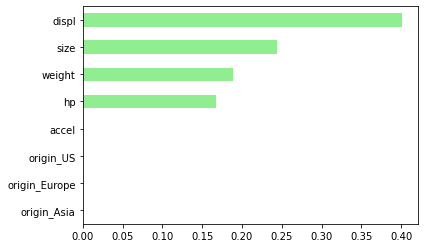

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
cars = pd.read_csv("mpg.csv")
df_origin = pd.get_dummies(cars)
X = df_origin.drop("mpg", axis=1)
y = df_origin["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred) ** 0.5
print("Test set RMSE of rf: {:.2f}".format(rmse_test))

importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind="barh", color="lightgreen")

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf=0.12, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rmse_test = MSE(y_test, y_pred) ** 0.5
print("Test set RMSE of dt: {:.2f}".format(rmse_test))

Tree-based methods enable measuring the importance of each feature in prediction. Displ, size, weight and hp are the most predictive features.

### Train an RF regressor

In [124]:
bike = pd.read_csv("bike.csv")
X = bike.drop("cnt", axis=1)
y = bike["cnt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(n_estimators=25, random_state=2)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

### Evaluate the RF regressor

In [125]:
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred) ** 0.5
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

dt = DecisionTreeRegressor(min_samples_leaf=0.12, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rmse_test = MSE(y_test, y_pred) ** 0.5
print("Test set RMSE of dt: {:.2f}".format(rmse_test))

Test set RMSE of rf: 51.84
Test set RMSE of dt: 126.57


### Visualizing features importances

Determine which features were the most predictive according to the random forests regressor rf

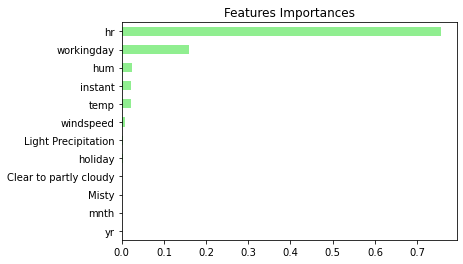

In [130]:
importances = pd.Series(data = rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind="barh", color="lightgreen", title='Features Importances')


Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%.